## Résolution du "Rocket Challenge".

---

Binôme : Khaled Ibrahim & Servranckx Christophe.

---

Le but du problème posé est d'étudier et de fournir divers données sur la trajectoire de vol d'une fusée, i.e sa vitesse à un instant donné, etc. 

Pour se faire nous allons, dans un premier temps, étudier les équations de mouvement (1) et (2) de la fusée ainsi que l'équation de variation de la masse de propergol fournies ci-dessous. 

Ensuite, nous allons utiliser la méthode d'Euler afin de résoudre numériquement ces équations et obtenir les données recherchées (l'altitude maximale atteinte, la vitesse d'impact au sol, etc).
Nous finirons par une discussion sur la cohérence des résultats obtenus.

##### 1. Réécriture des équations du mouvement de la fusée:

---
Commençons par rappeler les équations du mouvement de la fusée. Ces équations sont données par :

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

Il s'agit de deux EDO du premier ordre auxquelles nous pouvons appliquer la méthode d'Euler. 
C'est à dire une méthode numérique (qui offre donc une solution approximée par rapport à la solution exacte) qui consiste principalement à réexprimé nos EDO du premier odre en un système d'équations discrétisées. Une fois discrétisées, des solutions approximées sont alors obtenues à chaque itération. Notons finalement que la donnée de conditions initiales est essentielle car elles constituent les premières valeurs dont notre algorithme va se servir.

Comme annoncer, commençons par noter plus succinctement les dérivées par rapport au temps par des primes et faisons passer le terme $(m_s+m_p)$ du côté droit de l'égalité de l'équation (4). Nous obtenons alors:

\begin{align}
h' &= v\\
v' &= -g + \frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v|v|AC_D}{2 (m_s+m_p)}
\end{align}


Avant de poursuivre, notons que nous pouvons représenter ceci sous forme vectorielle. Notre système peut donc s'écrire comme suit:
$$u'(t) = f(u)$$

où

\begin{align}
u & = \begin{pmatrix} h  \\ v \\\end{pmatrix} & f(u) & = \begin{pmatrix} v \\ \frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v|v|AC_D}{2 (m_s+m_p)} - g  \end{pmatrix}.
\end{align}

Cette forme vectorielle présente l'avantage de représenter clairement ce qui devra être coder et comment ceci devra être fait. En effet, ces vecteurs correspondront tout simplement à des tableaux. Notons finalement que f(u) sera véritablement une fonction définie et appelée au cours de la méthode d'Euler.  



Poursuivons maintenant la réécriture de notre système en remplaçant chacune des dérivée temporelle par une forme approximée. Nous aurons ainsi, par exemple, pour $h'$ :

\begin{align}
h'(t) \approx \frac{h^{n+1}-h^n}{\Delta t}
\end{align}
où n représente la $n^{e}$ valeur dans l'itération temporelle. Nos deux équations deviennent ainsi :

\begin{align}
\frac{h^{n+1}-h^n}{\Delta t} &= v^n\\
\frac{v^{n+1}-v^n}{\Delta t} &= \frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v^n|v^n|AC_D}{2 (m_s+m_p)} - g
\end{align}


Enfin, dans le but d'évaluer l'état à $t^{n+1}$ (donc pour $h$ par exemple, on veut évaluer l'état $h^{n+1}$), on va évaluer toutes les données de notre système et ce à chaque itération $t^{n}$. Pour cela, il suffit d'isoler l'état n+1 dans chacune de nos équations.


\begin{align}
h^{n+1} &= {h^n} + \Delta{t} v^n\\
v^{n+1} &= {v^n} + \Delta{t} (\frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v^n|v^n|AC_D}{2 (m_s+m_p)} - g)
\end{align}

Ce qui nous donne finalement un système de deux EDO discrétisées sur lequel on va pouvoir appliqué la méthode d'Euler.

##### 2. Variation de la quantité de propergol au cours du vol:

---
A présent, si l'on observe l'évolution de la masse de $propergol^1$ tout au long de la trajectoire, on a que celle-ci évolue selon:
\begin{align}
m_p = m_{po} - \int^t_0 \dot{m}_p d\tau
\end{align}

À l'aide du graphique donné dans l'énoncé et repris ci-dessous, on peut déterminer $\dot{m}_p$, la variation de la masse de propergol tout au long du vol.

---
###### [1] Le propergol est un mélange de comburants (des oxydants) et de combustible (des réducteurs) présents séparément avant la combustion. Le propergol, parfois assimilé aux ergols (il s'agit également d'un mélange comburants-combustible), est utilisé comme carburant dans les systèmes propulsifs à réaction comme les fusées.

#### Variation de la masse de Propergol en fonction du temps
![Image](./figures/burn.rate.png)

---
###### source : 01 Phugoid/Rocket assignment.ipynb

A partir du graphique on observe que :

$$
→ \dot{m}_p = \left\{ 
\begin{aligned} 
\mbox{20  kg.$s^{-1}$ si t} \in \mbox{ [ } 0,5 [ s\\
\mbox{0 kg.$s^{-1}$ si t} \in \mbox{[} 5,+ \infty]s
\end{aligned}
\right.
$$



L'intégrale étant l'air sous la courbe, on sait de plus que $\dot{m}_p$ est constant (d'après la manière dont on l'a défini). On en déduit donc que la masse de propergol vaut :

$$
→ m_p = \left\{ 
\begin{aligned} 
\mbox{$m_{po}-20.t$ kg  si t} \in \mbox{ [ } 0,5 [ s\\
\mbox{0 kg si t} \in \mbox{[} 5,+ \infty]s
\end{aligned}
\right.
$$

##### 3. Résolution du problème:

---
Ramener aux trois équations reprises ci-dessous, notre problème peut désormais être résolu par la méthode d'Euler. 

\begin{equation}
\left\{
\begin{aligned}
m_p &= m_{po} - \int^t_0 \dot{m}_p d\tau\\
h^{n+1} &= {h^n} + \Delta{t} v^n\\
v^{n+1} &= {v^n} + \Delta{t} (\frac{v_e}{m_s+m_p}\dot{m}_p -                   \frac{\rho v^n|v^n|AC_D}{2 (m_s+m_p)} - g)\\
\end{aligned}
\right.
\end{equation}

Pour se faire commençons par importer la librairie numpy et tout ce dont nous aurons besoin pour la résolution.

---

In [1]:
import numpy
from math import log, ceil
from matplotlib import pyplot
%matplotlib inline

---
Ceci étant fait, définissons maintenant nos fonctions f(u) et euler_step comme vu tout au long du module à ceci près que nous n'avons plus quatre variables indépendantes mais deux. L'altitude $h$, et la vitesse de la fusée $v$.

---

In [2]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    h = u[0]
    v = u[1]
    return numpy.array([v,((v_e*m_p_dot)/(m_s+m_p))
                        - ((rho*v*abs(v)*A*C_D)/(2*(m_s+m_p)))-g])

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

---
Posons maintenant l'ensemble de nos paramètres et données initiales.

---

In [3]:
# Paramètres du modèle:

m_s = 50.0     # poids de la structure de la fusée en kg
g  = 9.81      # gravité en m.s^{-2}
rho = 1.091    # densité moyenne de l'air en kg.m^3
r  = 0.5       # rayon de la section transversale maximale de la fusée
A  = numpy.pi*r**2   # supericie de section transversale maximale de la fusée
v_e = 325.0    # vitesse d'échappement en m/s
C_D = 0.15     # coefficient de traînée
m_p0 = 100     # poids initiale (t=0) de propergol de la fusée

# Conditions initiales:

v0 = 0       # vitesse initiale de la fusée
h0 = 0       # altitude initiale de la fusée

---
Nos paramètres et conditions initiales étant posées, nous pouvons désormais passer à l'écriture de notre algorithme qui se déroulera en plusieurs étape.


Tout d'abord, nous allons discrétiser le temps grâce à notre intervalle de temps dt. Nous définirons ensuite une boucle "for" (de N étapes). Cette boucle sera alors "couplée" à un $booléen^{2}$ qui sera vérifié à chaque passage de la boucle afin de définir la masse du propergol et de calculer nos solutions par la fonction " euler_step " et ce par la logique (et la condition) suivante:

" Si le temps de l'étape n (où n est l'étape où l'on est en train de vérifier la condition) est strictement inférieur à 5s alors exécute ce qui suit sinon  exécute cette autre commande".


Remarque : Nous utiliserons ici les notations suivantes pour les variables de l'équation  $m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$ :

$\dot{m}_p :$ m_p_dot

$\int^t_0 \dot{m}_p d\tau :$ m_p_int

$m_{po} :$ m_p0


---
###### [2] Un booléen est une "variable" qui selon une condition donnée adoptera une valeur ou une autre. 

In [4]:
# Discrétisation du temps

T = 50.0
dt = 0.1
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)


u = numpy.empty((N, 2))      # Initialise le tableau de solution pour chaque dt
u[0] = numpy.array([h0,v0])  # remplit le 1er élément avec les CI


# On lance la boucle contenant notre booléen et qui appel notre fonction euler_step
for n in range(N-1): 
    if t[n] < 5 :
        m_p_dot = 20
        m_p_int= m_p_dot*t[n]
        m_p = m_p0 - m_p_int
        u[n+1] = euler_step(u[n], f, dt)

    else :
        m_p_dot = 0
        m_p = 0
        u[n+1] = euler_step(u[n], f, dt)

Remarque: Pour déterminer T (le temps d'observation de l'expérience), nous avions tout d'abord pris un temps arbitraire de $100 s$ tout comme dans les modules. En esquissant ensuite le graphe  correspondant à T=100s, nous avons alors pu restreindre notre temps d'observation à $50s$ qui suffisait amplement pour observer l'impact de la fusée au sol. Cette méthode par tatonnement fonctionne bien ici, mais comporte ses limites dans d'autres problème. Une autre méthode (estimation du temps d'observations par une série d'approximations sur les équations initiales par exemple) devra alors être adopter.

---
Nous sommes maintenant intéressé par voir la variation de l'altitude en fonction du temps. Ceci consistituera une première vérification de la cohérence physique de nos réponses.

Avant toute chose il convient de sélectionner les altitudes supérieur ou égale à 0, les valeurs négative n'ayant pas de sens car lorsque h=0, la fusée impact le sol. Pour se faire, nous allons utiliser un outil vu dans le module 1.04, " numpy.where()".
Pour rappel numpy.where() va créer une liste d'indice correspondant aux altitudes négatives. Nous utilisons ensuite un booléen pour vérifier si nos solutions comporte bien des valeurs négative d'altitude. Si tel est le cas alors le premier élément (le premier indice) de la liste créer par numpy.where correspond à la première altitude négative que nous considérons comme étant l'indice correspondant au niveau du sol.



Nous réalisons tout ceci via l'algorithme suivant :

---

In [5]:
# Méthode pour déterminer l'indice à partir duquel la hauteur devient négative

g=u[:,0]    # g est un vecteur comprenant l'ensemble de nos altitudes
k=u[:,1]    # k est un vecteur comprenant l'ensemble de nos vitesses

idx_negative_h = numpy.where(g<0.0)[0]  # création d'un liste d'indice correspondant aux valeurs négatives de h
if len(idx_negative_h)==0:       # si la liste créer est de longueur nulle alors :
    idx_ground_h = N-1           # l'indice "recherché" correspond au dernier élément de notre liste de départ         
else:
    idx_ground_h = idx_negative_h[0]    # dans le cas contraire l'indice recherché correspond au premier élément qui compose notre nouvelle liste
    

---
Ceci étant fait, nous pouvons désormais réaliser le graphe de l'altitude de la fusée en fonction du temps en indiquant de n'afficher que les valeurs d'altitude et de temps d'indice compris entre 0 et idx_ground_h (notre indice correspondant au niveau du sol)

---

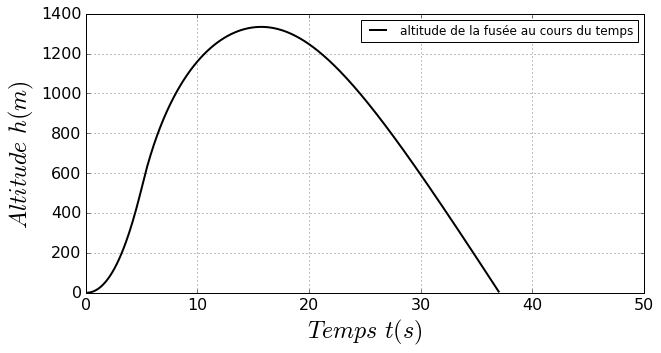

In [6]:
#Graphique de la hauteur de la fusée en fonction du temps

pyplot.figure(figsize=(10,5))
pyplot.grid(True) 
pyplot.xlim(0.0,50) 
pyplot.tick_params(axis='both', labelsize=16) 
pyplot.xlabel('$Temps$'' ''$t(s)$', fontsize=24)
pyplot.ylabel('$Altitude$'' ''$ h(m)$', fontsize=24)
pyplot.plot(t[:idx_ground_h],g[:idx_ground_h], color='k', ls='-', lw=2)
pyplot.legend(['altitude de la fusée au cours du temps'])


---
Avant de discuter du résultat obtenu, nous pouvons également réaliser le graphe de la vitesse en fonction du temps. Ce faisant, nous obtenons:

---

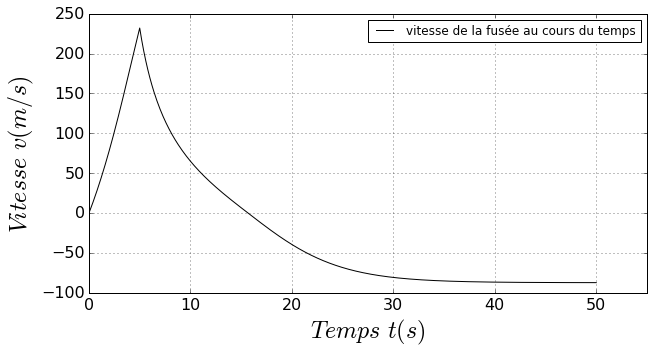

In [7]:
#Graphique de la vitesse de la fusée en fonction du temps
pyplot.figure(figsize=(10,5))   # initialise la taille du plot ("l'échelle d'affichage")
pyplot.xlim(0.0,55) 
pyplot.ylim(-100,250)             # limites du plot de l'axe y
pyplot.tick_params(axis='both', labelsize=16) # règle la taille de la police pour les graduations
pyplot.xlabel('$Temps$'' ''$t(s)$', fontsize=24) # nom de l'axe x & taille de la police
pyplot.ylabel('$Vitesse$'' ''$v(m/s)$', fontsize=24) # nom de l'axe y & taille de la police
pyplot.plot(t, k, 'k-');
pyplot.grid(True)
pyplot.legend(['vitesse de la fusée au cours du temps'])


##### 4. Analyse et interprétation physique des graphiques:
---

Le comportement observé sur ces deux graphiques répond à nos attentes. En effet, 

→ de t = 0s à t = 5s : La fusée consomme du propergol ce qui provoque un dégagement de gaz d'échappement et un déplacement de la fusée dans la direction opposée à ceux-ci (par la 3e loi de Newton). La fusée décolle donc et acquière une vitesse. C'est précisémment ce que l'on observe sur ces 2 graphique. Une augmentation progressive de l'altitude (lente dans un premier temps et qui s'accélère ensuite) associé à une augmentation progressive de la vitesse (la fusée accélère).

→ à t = 5s : À cet instant la fusée a consommé tout le propergol dont elle disposait. Donc à partir de ce moment la force exercée par les gaz d'échappement sur la fusée devient nulle. Or la force de pesanteur étant toujours présente, on s'attend donc à avoir une décélération de la fusée et donc une diminution de la vitesse de cette dernière. C'est à nouveau ce que l'on observe sur notre graphique.

L'instant t = 5s est donc un point d'inflexion de notre courbe d'altitudes en fonction du temps, auquel correspond la vitesse maximale atteinte par la fusée

→ de t = 5s à t = 50s : En l'absence de "force de poussée" (dû aux gaz d'échappement) la fusée décèlere de par la force pesanteur qui s'oppose à son mouvement. On s'attend donc (et c'est ce que l'on observe) à ce que la fusée atteigne une altitude maximale avant de commencer à chuter jusqu'à impacter le sol. En outre, nous voyons que la variation de la vitesse ne coïncide pas avec une chute libre ce qui est normal étant donné que nous considérons un terme de trainé qui a pour conséquence de ralentir la chute de la fusée.

Remarquons finalement la concordance des temps où la fusée atteint une hauteur maximale et où sa vitesse s'annule, ce qui satisfait à nos attentes.

##### 5. Questions - Réponses:  

---
Remarque préliminaire :

Afin de vérifier nos valeurs sur le site : http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about, toutes les valeurs affichées ci-dessous le sont avec deux décimales seulement et ce grâce à la commande : round(number, ndigits). Où ndigits est le nombre de décimale que l'on veut afficher et number, le nombre dont le nombre de décimale affichée sera restreint.

---
1) Au temps $t=3.2s$, quelle est la masse (en kg) de propergol restant dans la fusée ?

---
Pour obtenir la masse recherchée on lance une boucle for qui aura pour rôle de parcourir l'ensemble de nos valeurs de temps (0.0, 0.1, 0.2, ... 100.0) via l' indice correspondant à leur emplacement dans le tableau dans lequel ils sont rangés.

Cette boucle est alors couplée à un booléen muni de la condition suivante : " Si le temps de l'étape n (où n est l'étape où l'on est occupé à vérifier la condition) est égale à 3.2 s alors tu exécute ce qui suit".

Ainsi, si la condition est respecté notre algorithme calcul alors la masse de propergole recherchée selon l'équation : $m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$. 


Remarque : Notons que dans notre boucle for, on se restreint aux valeurs pertinentes, c'est à dire aux valeurs qui ont du sens dans notre situation : les valeurs comprises entre le décollage et l'impact au sol (toutes deux comprises). Concrètement il suffit de réemployé l'indice correspondant au niveau du sol obtenu auparavant et d'utiliser ce dernier comme indice d'arrêt dans la boucle for.


In [8]:
for n in range(idx_ground_h):   # On lance notre boucle for
    if t[n] == 3.2 :            # Notre booléen est alors vérifié pour chaque n
        m_p_dot = 20
        m_p_int= m_p_dot*t[n]   # On calcul "l'intégrale" pour le temps recherché 
        m_p = m_p0 - m_p_int    # On calcul finalement la masse de propergol restant au temps donné

print("→ Masse de propergol restante dans la fusée à t = 3.2s: m =", round(m_p,2), "kg")

→ Masse de propergol restante dans la fusée à t = 3.2s: m = 36.0 kg


---
2) Quelle est la vitesse maximale de la fusée en $\frac{m}{s}$ ?
A quelle moment cela se produit-il ? (en s)
Quelle est l'altitude à ce moment (en m) ?

---

On désire à présent trouver la vitesse maximale de la fusée au cours de son vol. Comme discuté dans la section précédente, la vitesse maximale sera atteinte au moment où tout le carburant aura été consommé. Toutefois, dans l'ensemble des valeurs que l'on a calculé pour la vitesse, certaine valeur de cette dernière (après impact au sol et qui n'ont donc pas de sens ici) pourrait potentiellement être supérieur (en module) à la vitesse recherché. Il convient donc de restreindre à nouveau nos valeurs de $v$ aux valeurs pertinentes. 


La vitesse recherchée sera alors trouver parmis ces valeurs via un booléen par simple comparaison de chacune des vitesses calculée ci-dessus.

Dès lors, l'altitude et le temps correspondant seront obtenus pour le même indice et de la même manière que la vitesse maximale. Une seule boucle for couplée à l'exécution d'un booléen suffit donc ici.

In [9]:
vm=0   # On initialise une variable vm qui correspond à notre vitesse maximale 

# Rappel : k et g sont des vecteurs comprennant, respectivement, l'ensemble de nos valeurs d'altitude et de vitesse

for n in range (idx_ground_h):
    if k[n] > vm:      # si vm est strictement plus petite que la vitesse de l'étape n alors:
        vm = k[n]      # notre nouvelle vitesse maximale est la vitesse de cet étape
        h_vmax = g[n]  # h_vmax est l'altitude correspondant à la vitesse maximale
        t_vmax = t[n]  # t_vmax est le temps correspondant à la vitesse maximale

print("→ Vitesse maximale atteinte par la fusée : v =",round(vm,2),"m/s")
print("")
print("→ Temps correspondant à la vitesse maximale : t =",round(t_vmax,2),"s")
print("")
print("→ Altitude correspondant à la vitesse maximale : h =",round(h_vmax,2),"m")


→ Vitesse maximale atteinte par la fusée : v = 232.11 m/s

→ Temps correspondant à la vitesse maximale : t = 5.0 s

→ Altitude correspondant à la vitesse maximale : h = 523.52 m


---
3) Quelle est l'altitude maximale de la fusée durant le vol (en m)? À quel moment (en s) cela se produit-il ?

---

Nous utilisons ici exactement la même logique que la question 2 à la différence que l'on repère ici la hauteur maximale atteinte par la fusée (parmis l'ensemble des valeurs pertinentes).

Le temps correspondant sera lui aussi obtenus par la même logique.

In [10]:
hm=0   # On initialise une variable hm qui correspond à notre hauteur maximale 

for n in range (idx_ground_h):
    if g[n] > hm :     # si hm est strictement plus petite que la vitesse de l'étape n alors:
        hm = g[n]      # notre nouvelle hauteur maximale est la hauteur de cet étape
        t_hmax = t[n]  # t_hmax est le temps correspondant à la hauteur maximale


print("→ Altitude maximale atteinte par la fusée : h =",round(hm,2),"m")
print("")
print("→ Temps correspondant : t =",round(t_hmax,2),"s")

→ Altitude maximale atteinte par la fusée : h = 1334.18 m

→ Temps correspondant : t = 15.7 s


---
4) A quel moment (en s) est-ce que la fusée impact le sol? Quelle est la vitesse de la fusée (en $\frac{m}{s}$) au moment de l'impact.

---

Pour se faire on se sert une dernière fois de notre indice du "niveau du sol" pour ressortir les valeurs de temps et de vitesse correspondante en demandant un simple affichage de celles-ci. 

In [11]:
print("→ Temps correspondant à l'impact au sol : t =",round(t[idx_ground_h],2),"s")
print("")
print("→ Vitesse correspondante à cette indice : v =",round(k[idx_ground_h],2),"m/s")


→ Temps correspondant à l'impact au sol : t = 37.1 s

→ Vitesse correspondante à cette indice : v = -86.01 m/s


---

##### 6. Bonus:
---

Nous voulons ici étudier nos solutions pour différent pas dt par le biais de la méthode d'Euler. En l'absence d'une solution analytique exacte à notre problème, nous allons comparer nos solutions à celles trouvées pour un très petit pas car comme nous l'avons vu, un petit pas offre une meilleur grille de solution. 

Pour se faire, rappelons tout d'abord les fonctions et paramètres dont nous allons avoir besoin.

In [12]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    h = u[0]
    v = u[1]
    return numpy.array([v,((v_e*m_p_dot)/(m_s+m_p))
                        - ((rho*v*abs(v)*A*C_D)/(2*(m_s+m_p)))-g])

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [13]:
# Paramètres du modèle:

m_s = 50.0     # poids de la structure de la fusée en kg
g  = 9.81      # gravité en m.s^{-2}
rho = 1.091    # densité moyenne de l'air en kg.m^3
r  = 0.5       # rayon de la section transversale maximale de la fusée
A  = numpy.pi*r**2   # supericie de section transversale maximale de la fusée
v_e = 325.0    # vitesse d'échappement en m/s
C_D = 0.15     # coefficient de traînée
m_p0 = 100     # poids initiale (t=0) de propergol de la fusée

# Conditions initiales:

v0 = 0       # vitesse initiale de la fusée
h0 = 0       # altitude initiale de la fusée


Nous pouvons à présent passer à la résolution du problème, mais avec un pas dt plus petit qu'avant.

In [14]:
# Discrétisation du temps

T = 50.0
dt = 0.001
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)


u_fine = numpy.empty((N, 2))      # Initialise le tableau de solution pour chaque dt
u_fine[0] = numpy.array([h0,v0])  # remplit le 1er élément avec les CI


# On lance la boucle contenant notre booléen et qui appel notre fonction euler_step
for n in range(N-1): 
    if t[n] < 5 :
        m_p_dot = 20
        m_p_int = m_p_dot*t[n]
        m_p = m_p0 - m_p_int
        u_fine[n+1] = euler_step(u_fine[n], f, dt)

    else :
        m_p_dot = 0
        m_p = 0
        u_fine[n+1] = euler_step(u_fine[n], f, dt)

La résolution étant maintenant faite, nous comparons les valeurs de la vitesse maximale/hauteur maximale obtenu avec $dt=0.01 s$ d'une part et d'autre part avec $dt=0.001 s$.

In [15]:
v_fine = u_fine[:,1]
v_fine_max = 0

for n in range (N-1):
    if v_fine[n] > v_fine_max:
        v_fine_max = v_fine[n]
             
print("→ Vitesse maximale atteinte par la fusée pour dt=0.001s : v =",round(v_fine_max,2),"m/s")
print("")
print("→ Vitesse maximale atteinte par la fusée pour dt=0.1s : v =",round(vm,2),"m/s")
print("")
print("Notre solution diffère donc de ",round(v_fine_max/vm,4),"% de la meilleur solution.")

→ Vitesse maximale atteinte par la fusée pour dt=0.001s : v = 232.44 m/s

→ Vitesse maximale atteinte par la fusée pour dt=0.1s : v = 232.11 m/s

Notre solution diffère donc de  1.0014 % de la meilleur solution.


In [16]:
h_fine = u_fine[:,0]
h_fine_max = 0

for n in range (N-1):
    if h_fine[n] > h_fine_max :
        h_fine_max = h_fine[n]
        
print("→ Altitude maximale atteinte par la fusée pour dt=0.1 : h =",round(hm,2),"m")
print("")
print("→ Altitude maximale atteinte par la fusée pour dt=0.001 : h =",round(h_fine_max,2),"m")
print("")
print("Notre solution diffère donc de ",round(h_fine_max/hm,4),"% de la meilleur solution.")

→ Altitude maximale atteinte par la fusée pour dt=0.1 : h = 1334.18 m

→ Altitude maximale atteinte par la fusée pour dt=0.001 : h = 1350.26 m

Notre solution diffère donc de  1.012 % de la meilleur solution.


On a ainsi trouvé à quel point nos solutions sont proches des solutions trouvées pour un pas plus petit. On peut donc considerer qu'une solution numérique a notre problème sera une bonne solution pour un pas donné, mais une meilleur solution pourra être obtenue par une résolution numérique avec un pas plus petit.

##### Odre de convergence

Pour finir on peut verifier l'ordre de convergence de notre méthode de résolution. On sait grâce au module 1 que la méthode d'Euler est d'ordre 1 ce qui correspond à la vitesse à laquelle la solution numérique converge vers la solution "exacte". N'ayant pas de solution dite exacte, nous créons 3 grilles de solution avec comme grille de référence, la meilleur grille qui correspond au $dt$ le plus petit (parmis tout nos dt). On prend un ratio r constant et on calcul ainsi l'ordre de convergence $p$:  

$$
\begin{equation}
p = \frac{\log \left(\frac{f_3-f_2}{f_2-f_1} \right) }{\log(r)}
\end{equation}
$$

Où $f_1$ est la meilleur grille de solutions et  $f_3$ la moins bonne.

Définissons d'abord la fonction qui va calculer la différence de nos solutions pour chacuns des différents $dt$. 

In [17]:
def get_diffgrid(u_current, u_fine, dt):
    """Returns the difference between one grid and the fine one using L-1 norm.
    
    Parameters
    ----------
    u_current : array of float
        solution on the current grid.
    u_finest : array of float
        solution on the fine grid.
    dt : float
        time-increment on the current grid.
    
    Returns
    -------
    diffgrid : float
        difference computed in the L-1 norm.
    """
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,1]- u_fine[::grid_size_ratio,1])) 
    
    return diffgrid

Remarque: diffgrid n'est autre que la norme L1 vu dans le module 1.02 "Phugoid Oscillations" et dont l'expression est donnée par : $$ E = \Delta t \sum_{n=0}^N \left|z(t_n) - z_n\right|$$

Dès lors l'algorithme reprenant l'idée détaillé ci-dessus est donné par :

In [18]:
r = 2
h = 0.001
dt_values = numpy.array([h, r*h, r**2*h])
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)
u_current=u_values[2] # grille des solutions dite moins bonnes
u_fine=u_values[0] # grille des meilleurs solutions
diffgrid = numpy.empty(2)

for i, dt in enumerate(dt_values):
    N = int(T/dt) + 1 
    
    ### discretize the time t ###
    t = numpy.linspace(0.0, T, N)
    
    
    u = numpy.empty((N, 2))      # Initialise le tableau de solution pour chaque dt
    u[0] = numpy.array([h0,v0])  # remplit le 1er élément avec les CI
    # time loop - Méthode d'Euler
    for n in range(N-1): 
        if t[n] < 5 :
            m_p_dot = 20
            m_p_int= m_p_dot*t[n]
            m_p = m_p0 - m_p_int
            u[n+1] = euler_step(u[n], f, dt)
        else :
            m_p_dot = 0
            m_p = 0
            u[n+1] = euler_step(u[n], f, dt)
    u_values[i] = u
    
#calculate f2 - f1
diffgrid[0] = get_diffgrid(u_values[1], u_values[0], dt_values[1])
#calculate f3 - f2
diffgrid[1] = get_diffgrid(u_values[2], u_values[1], dt_values[2])
# calculate the order of convergence
p = (log(diffgrid[1]) - log(diffgrid[0])) / log(r)
print("l'ordre de convergence est p "'= {:.3f}'.format(p));

l'ordre de convergence est p = 1.000


On retrouve bien pour notre problème que la méthode d'Euler est une méthode d'ordre 1.

---

##### 7. Conclusions:
---

Comme annoncé au départ, nous avons grâce à la méthode d'Euler résolu numériquement le problème de la trajectoire de la fusée. À l'aide de ces solutions nous avons pu esquisser le graphique de la trajectoire de la fusée ainsi que celui de sa vitesse au cours du temps. 

Ces derniers, nous ont offert un premier aperçus de la pertinence de nos solutions tandis que quelque codes supplémentaires nous ont permis d'obtenir les données annoncées, des valeurs concrètes. 

Ces données ont ensuite été verifié sur le site http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about. Nous avons résolu le problème avec un pas plus petit et vu à quel point les solutions obtenu pour $dt=0.1 s$ sont proches de ces solutions. 


Enfin, ce challenge nous a permis d'appliquer, au travers d'un nouvel exemple, la méthode de résolution numérique des équations différentielles qu'est la méthode d'Euler.

---

##### 8. Sources:
---

[1] https://fr.wikipedia.org/wiki/Propergol

[2] Cours d'informatique de Ba2 donné par M. Pourbaix, professeur à l'ULB.

---

###### The cell below loads the style of the notebook.

In [19]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())